# EDA on COVID_19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('country_wise_latest.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


### Univariate Analysis

In [5]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [7]:
df['Country/Region'].to_string()

"0                           Afghanistan\n1                               Albania\n2                               Algeria\n3                               Andorra\n4                                Angola\n5                   Antigua and Barbuda\n6                             Argentina\n7                               Armenia\n8                             Australia\n9                               Austria\n10                           Azerbaijan\n11                              Bahamas\n12                              Bahrain\n13                           Bangladesh\n14                             Barbados\n15                              Belarus\n16                              Belgium\n17                               Belize\n18                                Benin\n19                               Bhutan\n20                              Bolivia\n21               Bosnia and Herzegovina\n22                             Botswana\n23                               Brazil\n24             

In [8]:
pd.set_option('display.max_rows',None)

In [9]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [10]:
df['Country/Region'].nunique()

187

In [11]:
df['Country/Region'].value_counts().sum()

187

In [12]:
# plt.pie(df['Country/Region']) # ValueError: could not convert string to float: 'Afghanistan'

<Axes: ylabel='count'>

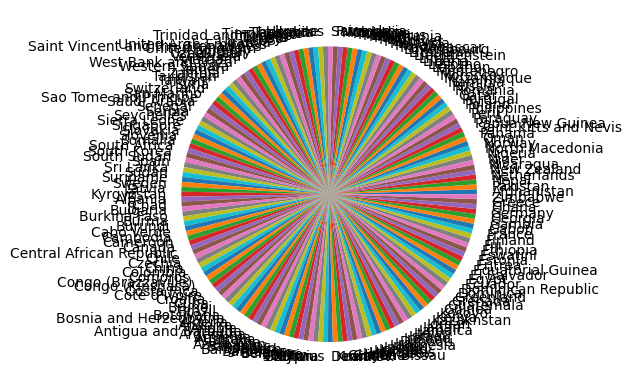

In [13]:
df['Country/Region'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

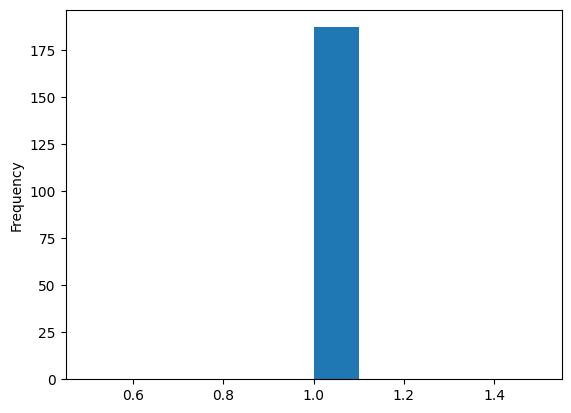

In [14]:
df['Country/Region'].value_counts().plot(kind='hist')

C:\Users\Digvijay Mohite\AppData\Local\Temp\ipykernel_29360\1893306042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Country/Region'].value_counts())
C:\Users\Digvijay Mohite\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='count', ylabel='Density'>

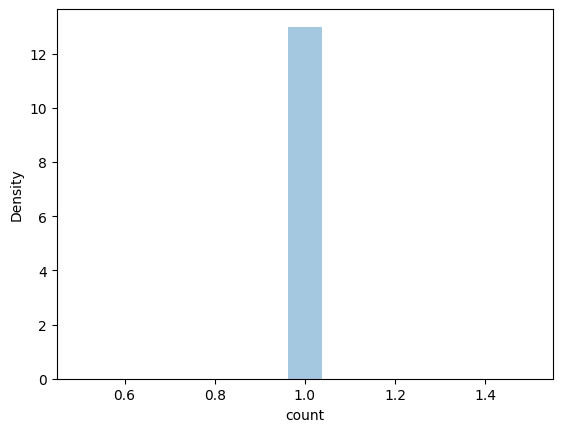

In [15]:
sns.distplot(df['Country/Region'].value_counts())

In [16]:
df['Confirmed'].value_counts()

Confirmed
24         2
86         2
10621      2
109597     1
9132       1
1843       1
18752      1
53413      1
1557       1
3439       1
1132       1
41180      1
10213      1
77058      1
50299      1
1701       1
61442      1
62         1
4548       1
389717     1
82040      1
43402      1
45902      1
274289     1
20887      1
1879       1
2893       1
1219       1
3882       1
505        1
1167       1
2827       1
2019       1
6321       1
9690       1
3664       1
8904       1
3369       1
2513       1
701        1
6208       1
344        1
395489     1
23154      1
116        1
289        1
816680     1
36263      1
17         1
674        1
7235       1
509        1
3297       1
874        1
148        1
1455       1
227019     1
4290259    1
1128       1
67096      1
59177      1
301708     1
1202       1
21209      1
15988      1
431        1
10         1
1691       1
4552       1
462        1
34477      1
33296      1
79395      1
52         1
699        1
865        1
26

<Axes: ylabel='Confirmed'>

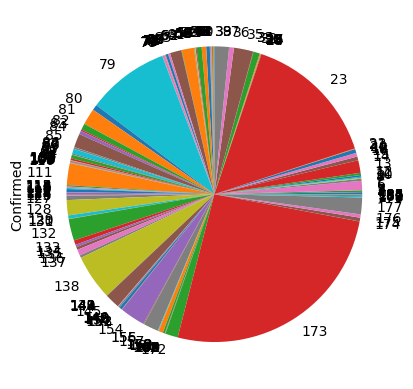

In [17]:
df['Confirmed'].plot(kind='pie')

In [18]:
df[['Country/Region','Confirmed']].iloc[173]

Country/Region         US
Confirmed         4290259
Name: 173, dtype: object

In [19]:
df[['Country/Region','Confirmed']].iloc[23]

Country/Region     Brazil
Confirmed         2442375
Name: 23, dtype: object

In [20]:
df[['Country/Region','Confirmed']].iloc[79]

Country/Region      India
Confirmed         1480073
Name: 79, dtype: object

C:\Users\Digvijay Mohite\AppData\Local\Temp\ipykernel_29360\2583863063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Confirmed'])


<Axes: xlabel='Confirmed', ylabel='Density'>

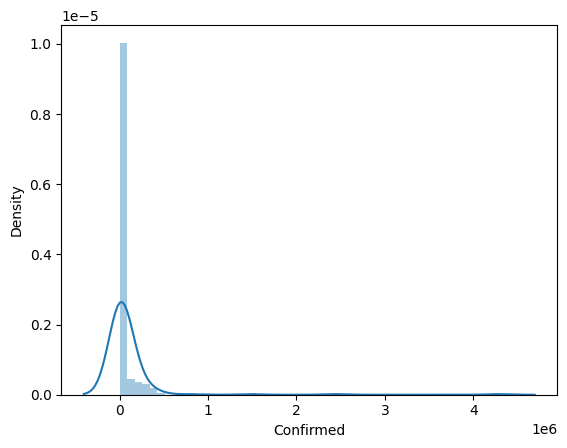

In [21]:
sns.distplot(df['Confirmed'])

In [22]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [23]:
df['Deaths'].unique()

array([  1269,    144,   1163,     52,     41,      3,   3059,    711,
          167,    713,    423,     11,    141,   2965,      7,    538,
         9822,      2,     35,      0,   2647,    294,  87618,    347,
           53,      6,      1,     22,    391,   8944,     59,     75,
         9187,   4656,   8777,     54,    208,    115,     96,    139,
           87,     19,    373,    613,     58,   1083,   5532,   4652,
          408,     51,     69,     34,    228,    329,  30212,     49,
            8,     16,   9125,    168,    202,   1761,     45,     26,
           20,    158,   1166,    596,     10,  33408,   4838,  15912,
         4458,   1764,    474,  35112,    998,    585,    285,    185,
          438,   1301,     31,     12,     72,     64,     80,    112,
           91,     99,    124,     15,      9,    156,  44022,    748,
            4,    316,     48,   6160,    108,    860,    466,    255,
          393,   5842,   1322,     43,  18418,   1945,   1676,   1719,
      

In [24]:
df['Deaths'].sum()

654036

<Axes: ylabel='Deaths'>

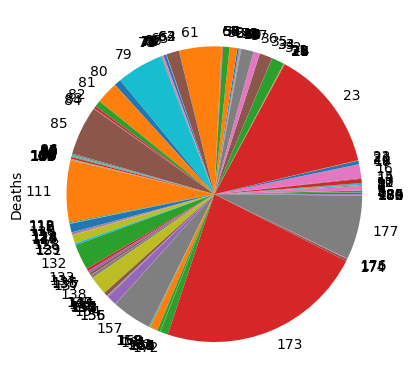

In [25]:
df['Deaths'].plot(kind='pie')

In [26]:
df[['Country/Region','Deaths']].iloc[[23,61,79,111,173,132,157,]]

,Country/Region,Deaths
23,Brazil,87618
61,France,30212
79,India,33408
111,Mexico,44022
173,US,148011
132,Peru,18418
157,Spain,28432


In [27]:
df2=df[['Country/Region','Deaths']].iloc[[23,61,79,111,173,132,157,]]

<Axes: >

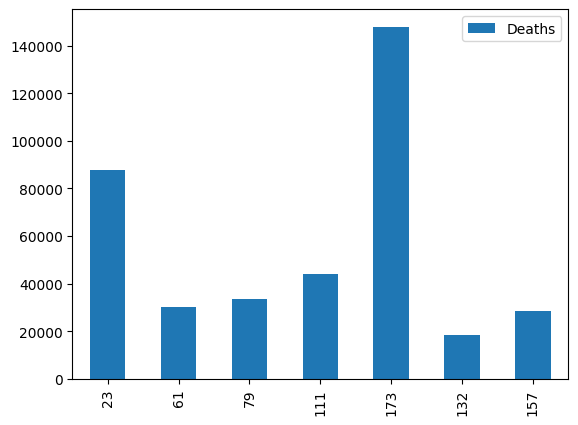

In [28]:
df2.plot(kind='bar')

In [29]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [30]:
df['Recovered'].unique()

array([  25198,    2745,   18837,     803,     242,      65,   72575,
         26665,    9311,   18246,   23242,      91,   36110,  125683,
            94,   60492,   17452,      26,    1036,      86,   21478,
          4930,      63, 1846641,     138,    5585,     926,     292,
           301,    1550,     147,   14539,       0,    1546,     810,
        319954,   78869,  131161,     328,     829,    5700,    3824,
         10361,    3936,    2351,     852,   11428,   12605,    4977,
            18,   30204,   34896,   34838,    7778,     842,     191,
          1923,    1025,    6386,    6920,   81212,    4682,      66,
           922,  190314,   29801,    1374,      13,      23,   32455,
          6257,     181,    4365,      12,    5039,    3329,    1823,
        951166,   58173,  255144,   77144,   23364,   27133,  198593,
           714,   21970,    1041,   54404,    7833,    4027,   55057,
         21205,      19,    1045,    1709,     128,     646,     577,
            81,    1

In [31]:
df['Recovered'].sum()

9468087

<Axes: ylabel='Recovered'>

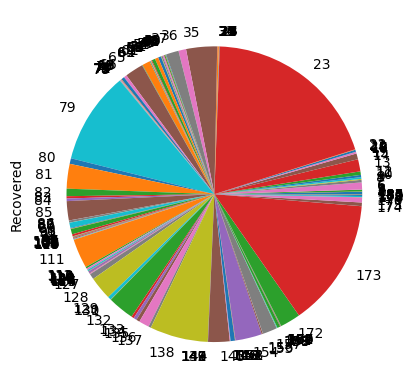

In [32]:
df['Recovered'].plot(kind='pie')

In [33]:
df[['Country/Region','Recovered']].iloc[[23,61,81,79,111,173,138,157,]]

,Country/Region,Recovered
23,Brazil,1846641
61,France,81212
81,Iran,255144
79,India,951166
111,Mexico,303810
173,US,1325804
138,Russia,602249
157,Spain,150376


<Axes: ylabel='Active'>

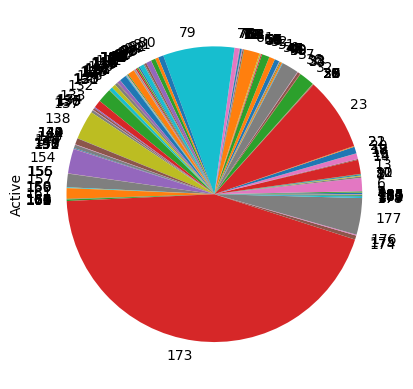

In [34]:
df['Active'].plot(kind='pie')

In [35]:
df[['Country/Region','Active']].iloc[[173,79,23,138,154,156,177]]

,Country/Region,Active
173,US,2816444
79,India,495499
23,Brazil,508116
138,Russia,201097
154,South Africa,170537
156,South Sudan,1084
177,United Kingdom,254427


<Axes: ylabel='New cases'>

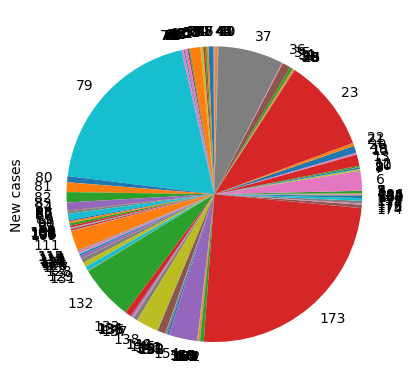

In [36]:
df['New cases'].plot(kind='pie')

In [37]:
df[['Country/Region','New cases']].iloc[[173,79,23,138,154,156,177]]

,Country/Region,New cases
173,US,56336
79,India,44457
23,Brazil,23284
138,Russia,5607
154,South Africa,7096
156,South Sudan,43
177,United Kingdom,688


<Axes: ylabel='New deaths'>

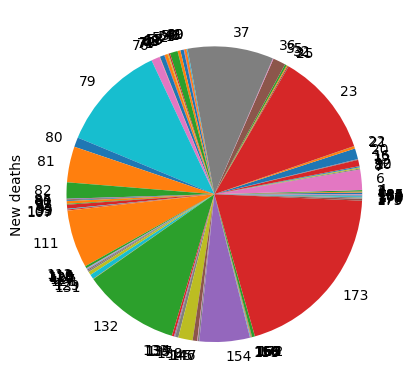

In [38]:
df['New deaths'].plot(kind='pie')

In [39]:
df[['Country/Region','New deaths']].iloc[[173,79,23,111,132,81,6,154]]

,Country/Region,New deaths
173,US,1076
79,India,637
23,Brazil,614
111,Mexico,342
132,Peru,575
81,Iran,212
6,Argentina,120
154,South Africa,298


In [40]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


<Axes: ylabel='New recovered'>

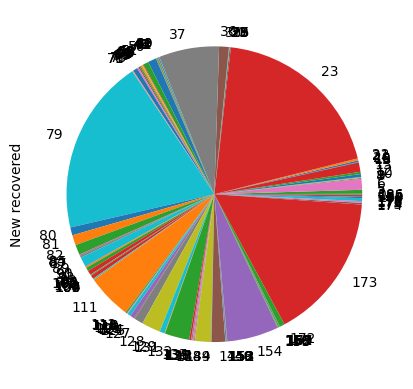

In [41]:
df['New recovered'].plot(kind='pie')

In [42]:
df[['Country/Region','New deaths']].iloc[[173,79,23,154,111,37]]

,Country/Region,New deaths
173,US,1076
79,India,637
23,Brazil,614
154,South Africa,298
111,Mexico,342
37,Colombia,508


<Axes: ylabel='Deaths / 100 Cases'>

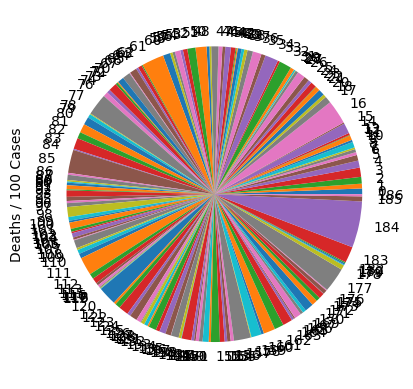

In [43]:
df['Deaths / 100 Cases'].plot(kind='pie')

In [44]:
df[['Country/Region','Confirmed','Deaths','Deaths / 100 Cases']]

,Country/Region,Confirmed,Deaths,Deaths / 100 Cases
0,Afghanistan,36263,1269,3.50
1,Albania,4880,144,2.95
2,Algeria,27973,1163,4.16
3,Andorra,907,52,5.73
4,Angola,950,41,4.32
5,Antigua and Barbuda,86,3,3.49
6,Argentina,167416,3059,1.83
7,Armenia,37390,711,1.90
8,Australia,15303,167,1.09
9,Austria,20558,713,3.47


<Axes: ylabel='Recovered / 100 Cases'>

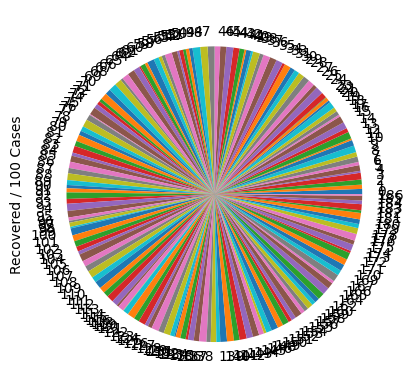

In [45]:
df['Recovered / 100 Cases'].plot(kind='pie')

In [46]:
df['Deaths / 100 Recovered']

0         5.04
1         5.25
2         6.17
3         6.48
4        16.94
5         4.62
6         4.21
7         2.67
8         1.79
9         3.91
10        1.82
11       12.09
12        0.39
13        2.36
14        7.45
15        0.89
16       56.28
17        7.69
18        3.38
19        0.00
20       12.32
21        5.96
22        3.17
23        4.74
24        2.17
25        6.21
26        5.72
27        2.05
28        0.33
29        1.42
30        0.00
31        2.69
32         inf
33        3.82
34        9.26
35        2.87
36        5.90
37        6.69
38        2.13
39        6.51
40        3.65
41        3.01
42        0.93
43        3.53
44        3.70
45        2.23
46        3.26
47        4.86
48        1.17
49        0.00
50        3.59
51       15.85
52       13.35
53        5.25
54        6.06
55        0.00
56        3.59
57        3.32
58        3.57
59        0.00
60        4.75
61       37.20
62        1.05
63       12.12
64        1.74
65        4.79
66        

In [47]:
df['Deaths / 100 Recovered'].replace(np.inf,0,inplace=True)

In [48]:
df['Deaths / 100 Recovered']

0         5.04
1         5.25
2         6.17
3         6.48
4        16.94
5         4.62
6         4.21
7         2.67
8         1.79
9         3.91
10        1.82
11       12.09
12        0.39
13        2.36
14        7.45
15        0.89
16       56.28
17        7.69
18        3.38
19        0.00
20       12.32
21        5.96
22        3.17
23        4.74
24        2.17
25        6.21
26        5.72
27        2.05
28        0.33
29        1.42
30        0.00
31        2.69
32        0.00
33        3.82
34        9.26
35        2.87
36        5.90
37        6.69
38        2.13
39        6.51
40        3.65
41        3.01
42        0.93
43        3.53
44        3.70
45        2.23
46        3.26
47        4.86
48        1.17
49        0.00
50        3.59
51       15.85
52       13.35
53        5.25
54        6.06
55        0.00
56        3.59
57        3.32
58        3.57
59        0.00
60        4.75
61       37.20
62        1.05
63       12.12
64        1.74
65        4.79
66        

<Axes: ylabel='Deaths / 100 Recovered'>

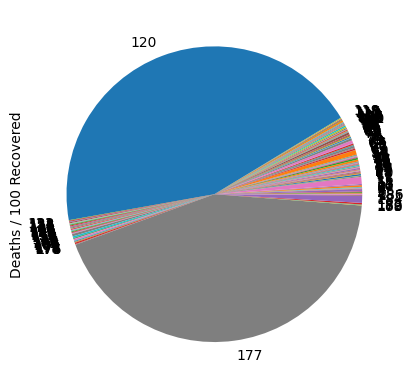

In [49]:
df['Deaths / 100 Recovered'].plot(kind='pie')

In [50]:
df[['Country/Region','Deaths / 100 Recovered']].iloc[[177,120]]

,Country/Region,Deaths / 100 Recovered
177,United Kingdom,3190.26
120,Netherlands,3259.26


<Axes: >

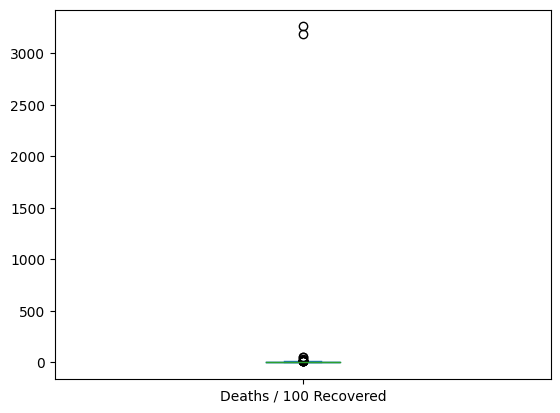

In [51]:
df['Deaths / 100 Recovered'].plot(kind='box')

In [52]:
df['Deaths / 100 Recovered'].describe()

count     187.000000
mean       39.473850
std       332.178192
min         0.000000
25%         1.295000
50%         3.510000
75%         6.190000
max      3259.260000
Name: Deaths / 100 Recovered, dtype: float64

In [53]:
median=df['Deaths / 100 Recovered'].median()
df['Deaths / 100 Recovered']=np.where(df['Deaths / 100 Recovered']>median, median, df['Deaths / 100 Recovered'])

<Axes: ylabel='Deaths / 100 Recovered'>

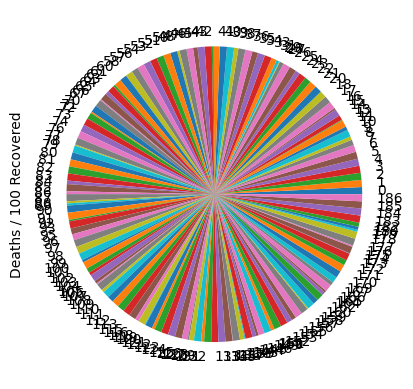

In [54]:
df['Deaths / 100 Recovered'].plot(kind='pie')

<Axes: >

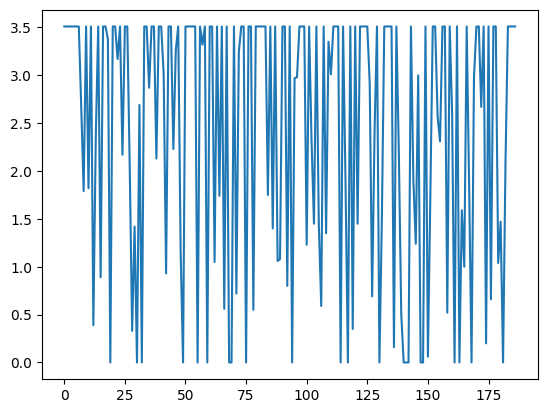

In [55]:
df['Deaths / 100 Recovered'].plot(kind='line')

In [56]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,3.51,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,3.51,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,3.51,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,3.51,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,3.51,749,201,26.84,Africa


<Axes: ylabel='Confirmed last week'>

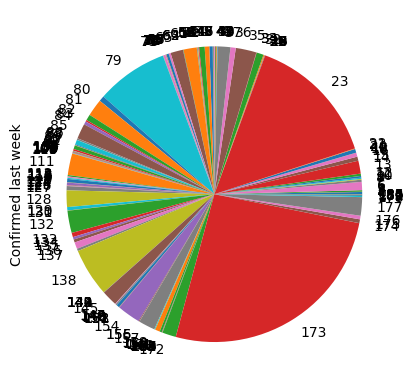

In [57]:
df['Confirmed last week'].plot(kind='pie')

<Axes: >

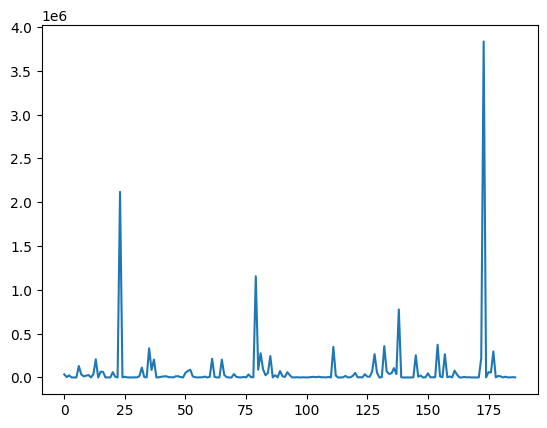

In [58]:
df['Confirmed last week'].plot(kind='line')

In [59]:
# df['1 week change'].plot(kind='pie') # ValueError: pie plot doesn't allow negative values

<Axes: >

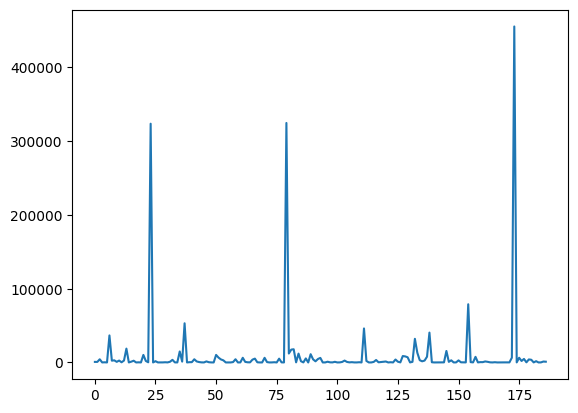

In [60]:
df['1 week change'].plot(kind='line')

<Axes: ylabel='Frequency'>

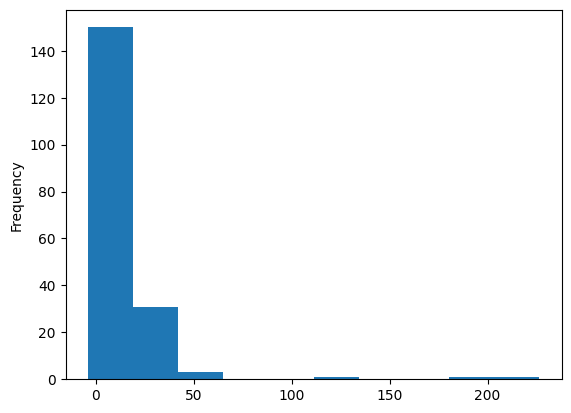

In [61]:
df['1 week % increase'].plot(kind='hist')

In [62]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,3.51,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,3.51,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,3.51,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,3.51,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,3.51,749,201,26.84,Africa


<Axes: ylabel='count'>

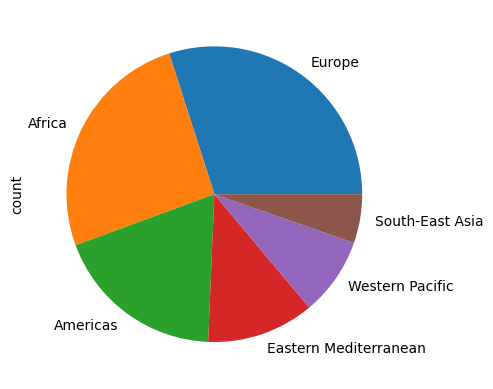

In [63]:
df['WHO Region'].value_counts().plot(kind='pie')

<Axes: ylabel='WHO Region'>

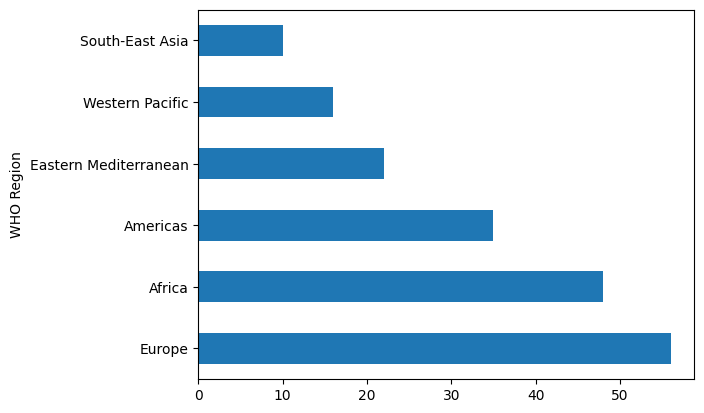

In [64]:
df['WHO Region'].value_counts().plot(kind='barh')

In [65]:
df.sort_values(by=['WHO Region'])

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,3.51,1713,991,57.85,Africa
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
38,Comoros,354,7,328,19,0,0,0,1.98,92.66,2.13,334,20,5.99,Africa
39,Congo (Brazzaville),3200,54,829,2317,162,3,73,1.69,25.91,3.51,2851,349,12.24,Africa
40,Congo (Kinshasa),8844,208,5700,2936,13,4,190,2.35,64.45,3.51,8443,401,4.75,Africa
42,Cote d'Ivoire,15655,96,10361,5198,59,0,183,0.61,66.18,0.93,14312,1343,9.38,Africa
149,Sierra Leone,1783,66,1317,400,0,0,4,3.70,73.86,3.51,1711,72,4.21,Africa
148,Seychelles,114,0,39,75,0,0,0,0.00,34.21,0.00,108,6,5.56,Africa
98,Liberia,1167,72,646,449,5,0,5,6.17,55.36,3.51,1107,60,5.42,Africa
144,Sao Tome and Principe,865,14,734,117,2,0,38,1.62,84.86,1.91,746,119,15.95,Africa


# Bivariate Analysis

In [66]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,3.51,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,3.51,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,3.51,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,3.51,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,3.51,749,201,26.84,Africa


<Axes: >

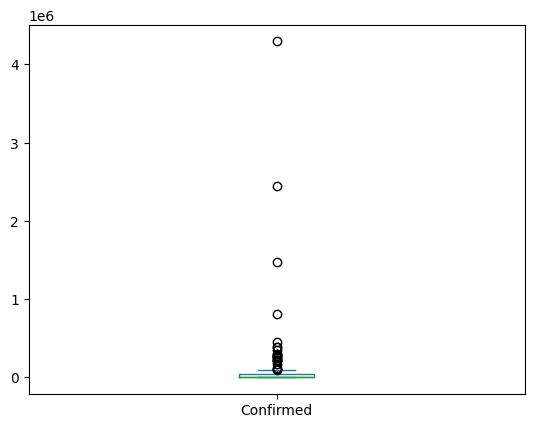

In [81]:
df[['Country/Region','Confirmed']].plot()